In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

In [2]:
k = 1
h = 0.2
B0 = 0
B1 = 0.3
w = 1
L = 1
theta_B = 80

nodos = 20

In [4]:
def eficiencia(perfil):
    perfil_inferior = B1*(1-np.linspace(0,1,nodos))
    P = 2*(perfil+perfil_inferior+w)
    A = (perfil_inferior+perfil)*w
    dx = L/nodos

    coeficientes = np.zeros((nodos,nodos))
    coeficientes[0,0] = 1 #Theta(0) = Theta_B
    
    coeficientes[-1,-1] = 3
    coeficientes[-1,-2] = -4
    coeficientes[-1,-3] = 1 #theta_i-2 - 4theta_i-1 + 3theta_i = 2theta_prima*deltaX

    constantes = np.zeros(nodos)
    constantes[0] = theta_B

    for i in range(1,nodos-1):

        coeficientes[i,i] = -2*A[i] - h*P[i]*dx**2/k
        coeficientes[i,i-1] = A[i]-(A[i+1]-A[i-1])/4
        coeficientes[i,i+1] = A[i]+(A[i+1]-A[i-1])/4

    A_inv = np.linalg.inv(coeficientes)
    Thetas = np.matmul(A_inv,constantes)
    
    Q = np.trapz(h*P*Thetas,np.linspace(0,L,nodos))
    Qm = np.trapz(h*P*theta_B,np.linspace(0,L,nodos))
    Eta = Q/Qm
    return Eta #, Thetas

In [6]:
# print(eficiencia(B0*np.ones(nodos)))
# print(eficiencia(B0*(1-np.linspace(0,1,nodos))))

etaRect = eficiencia(B1-np.linspace(0,B1,nodos))
print(etaTri,et)

0.7729403092589769


In [5]:
tiempo0 = time.time()

perfil_prueba = B0*np.ones(nodos)
paso = 0.01
cambio = []
etas = []
cte_gradiente = 0.1
iteraciones = 0

eta = 0
eta_nuevo = 1
gradiente = np.zeros(nodos)

while eta_nuevo > eta:
    
    perfil_prueba = perfil_prueba+gradiente
    iteraciones += 1
    gradiente = [0]
    eta,thetas = eficiencia(perfil_prueba)
    etas.append(eta)
    for i in range(1,nodos):
        
        perfil_nuevo = perfil_prueba.copy()
        perfil_nuevo[i] += paso
        eta_i,thetas = eficiencia(perfil_nuevo)
        nabla_i = (eta_i-eta)
        #nabla_i *= (1.*(nabla_i<0))#*(1.*(perfil_nuevo[i]>0))
        if nabla_i*cte_gradiente + perfil_prueba[i] <= 0 or nabla_i*cte_gradiente+perfil_prueba[i]>B0:
            nabla_i = 0
        gradiente.append(nabla_i)

    
    gradiente = np.array(gradiente)*cte_gradiente
    norma_nabla = np.sqrt(np.sum(np.square(gradiente)))
    cambio.append(norma_nabla)
    #print(cambio)
    eta_nuevo,thetas = eficiencia(perfil_prueba+gradiente)
    if iteraciones>20000:
        break
    #iteraciones += 1.
    
#     if iteraciones > 1000:
#         break

print('Tiempo por iteración = {:.2f}'.format((time.time()-tiempo0)/iteraciones))
print('Iteraciones = ' + str(iteraciones) + '; Tiempo = ' + str(time.time()-tiempo0))

Tiempo por iteración = 0.00
Iteraciones = 196577; Tiempo = 838.329238653183


0.031301305165719384
[1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 9.99997759e-01 9.99983240e-01 9.99893533e-01
 9.84554755e-01 8.07930134e-01 5.91765396e-01 4.29562467e-01
 3.06364916e-01 4.28017624e-01 9.99959833e-01 2.98204503e-05
 8.61368429e-06 7.35929951e-01 3.50639388e-06 3.33951297e-02]


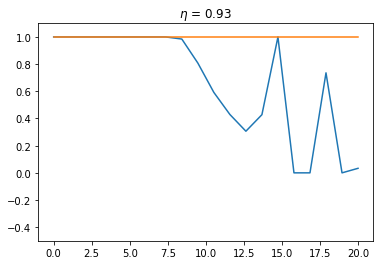

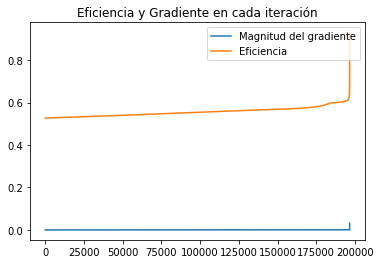

In [6]:
eta,thetas = eficiencia(perfil_prueba)

plt.figure()
plt.plot(np.linspace(0,L,20),perfil_prueba)
plt.plot(np.linspace(0,L,20),B0*np.ones(nodos))
plt.ylim(-0.5,1.1)
plt.title('$\eta$ = {:.2f}'.format(eta))
print(norma_nabla)

plt.figure()
plt.plot(np.linspace(1,len(cambio),len(cambio)),cambio,label='Magnitud del gradiente')
plt.plot(np.linspace(1,len(cambio),len(cambio)),etas,label = 'Eficiencia')
plt.title('Eficiencia y Gradiente en cada iteración')
plt.legend(loc=1)

print(perfil_prueba)

0.8160570252342576


Text(0.5, 1.0, '$\\eta$ = 0.93')

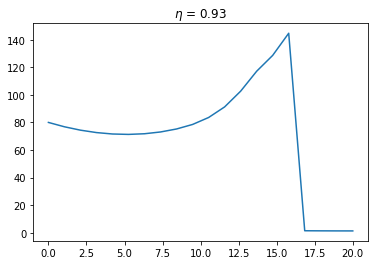

In [7]:
perfil = B0*np.ones(nodos)
eta,thetas = eficiencia(perfil_prueba)
print(etas[-2])

plt.figure()
plt.plot(np.linspace(0,L,nodos),thetas)
plt.title('$\eta$ = {:.2f}'.format(eta))